#### The NSF Ocean Observatories Initiative (OOI) provides [Discrete CTD and Water Sampling Cruise Data](https://www.bco-dmo.org/project/905736) for each Array as a dataset in the Biological and Chemical Oceanography Data Management Office (BCO-DMO).
### Goal of this notebook: Quickly plot OOI's Water Sampling data from an Array over time for several parameters
- Example: 
  - Global Irminger Sea Array from 2014-2023 for Oxygen, Salinity, Nitrate, and Chlorophyll [doi:10.26008/1912/bco-dmo.911407.1](https://www.bco-dmo.org/dataset/911407)


### Set Up
The GitHub repository containing this notebook includes information about dependencies (and versions) in .yml files.

In [1]:
# %pip install cmocean # if import modules cell results in ModuleNotFoundError

In [2]:
# Import modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import cmocean.cm as cmo # colormaps for commonly-used oceanographic variables

In [3]:
# print(mpl.__version__) # if plot cell results in error check version of matplotlib

### Load OOI data into workspace
To access the data in comma separated variable (CSV) format, one can either:
- (as shown here) access the File through the URL at ERDDAP > Files 
- or generate a URL using the ERDDAP Data Access Form
  - If using the ERDDAP Data Access Form, file type .csvp provides a single header row. 
  - If using the ERDDAP Data Access Form, one can subset (e.g., select variables of interest) prior to loading the data.


In [4]:
# Load OOI data into the workspace using the
# ERDDAP link to the public dataset CSV.
ooi_irm = pd.read_csv(
    "https://erddap.bco-dmo.org/erddap/files/"
    "bcodmo_dataset_911407_v1/"
    "911407_v1_ooi_irminger_sea_discrete"
    "_water_sampling_data.csv"
)
# Call head() to check that the data was imported correctly
ooi_irm.head()

,Cruise,Station,Target_Asset,Start_Latitude,Start_Longitude,Start_Time,Cast,Cast_Flag,Bottom_Depth_at_Start_Position,CTD_File,...,Discrete_pH_Replicate_Flag,Calculated_Alkalinity,Calculated_DIC,Calculated_pCO2,Calculated_pH,Calculated_CO2aq,Calculated_Bicarb,Calculated_CO3,Calculated_Omega_C,Calculated_Omega_A
0,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KN221-04,1,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,NaN,KN22104001.hex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### List available parameters
Convert relevant parameters to datetime if needed

In [5]:
# Print a list of column names
print(ooi_irm.columns)

Index(['Cruise', 'Station', 'Target_Asset', 'Start_Latitude',
       'Start_Longitude', 'Start_Time', 'Cast', 'Cast_Flag',
       'Bottom_Depth_at_Start_Position', 'CTD_File', 'CTD_File_Flag',
       'Niskin_Bottle_Position', 'Niskin_Flag', 'CTD_Bottle_Closure_Time',
       'CTD_Pressure', 'CTD_Pressure_Flag', 'CTD_Depth', 'CTD_Latitude',
       'CTD_Longitude', 'CTD_Temperature_1', 'CTD_Temperature_1_Flag',
       'CTD_Temperature_2', 'CTD_Temperature_2_Flag', 'CTD_Conductivity_1',
       'CTD_Conductivity_1_Flag', 'CTD_Conductivity_2',
       'CTD_Conductivity_2_Flag', 'CTD_Salinity_1', 'CTD_Salinity_2',
       'CTD_Oxygen', 'CTD_Oxygen_Flag', 'CTD_Oxygen_Saturation',
       'CTD_Fluorescence', 'CTD_Fluorescence_Flag', 'CTD_Beam_Attenuation',
       'CTD_Beam_Transmission', 'CTD_Transmissometer_Flag', 'CTD_pH',
       'CTD_pH_Flag', 'Discrete_Oxygen', 'Discrete_Oxygen_Flag',
       'Discrete_Oxygen_Replicate_Flag', 'Discrete_Chlorophyll',
       'Discrete_Phaeopigment', 'Discrete_Fo_

In [6]:
# ooi_irm.dtypes["CTD_Bottle_Closure_Time"]

In [7]:
# Convert the CTD Bottle Closure Time to a datetime data type
ooi_irm["CTD_Bottle_Closure_Time"] = pd.to_datetime(ooi_irm["CTD_Bottle_Closure_Time"], yearfirst=True, utc=True)
ooi_irm.dtypes["CTD_Bottle_Closure_Time"]

datetime64[ns, UTC]

### Apply QC flags
For functions to interpret OOI discrete sample CTD flags to QARTOD QC-flags please see Bottles.py file in https://github.com/oceanobservatories/ooi-data-explorations

In [8]:
# display unique Discrete Sample flags
# ooi_irm.Discrete_Oxygen_Flag.unique() # display unique one column
pd.unique(ooi_irm[["Discrete_Oxygen_Flag", "Discrete_Salinity_Flag", "Discrete_Nutrients_Flag", "Discrete_Fluorescence_Flag"]].values.ravel('K')) # display unique multiple columns

array([nan, '*0000000000000100', '*0000000000000010', '*0000000000000101',
       '*0000000000001001', '*0000000000001000'], dtype=object)

In [9]:
# Filter for samples with "Acceptable" flags
# 1 in Bit Position 2 (i.e., 3rd from right)
flag1 = "*0000000000000100"
flag2 = "*0000000000000101" # this example had 2 unique "Acceptable" flags

#irm_qc = ooi_irm.query("Discrete_Oxygen_Flag==@flag1 | Discrete_Oxygen_Flag==@flag2")
irm_qc = ooi_irm.query("Discrete_Oxygen_Flag==@flag1 | Discrete_Oxygen_Flag==@flag2 | Discrete_Salinity_Flag==@flag1 | Discrete_Salinity_Flag==@flag2 | Discrete_Nutrients_Flag==@flag1 | Discrete_Nutrients_Flag==@flag2 | Discrete_Fluorescence_Flag==@flag1 | Discrete_Fluorescence_Flag==@flag2")
print(f"Subsetting to Discrete Samples and Acceptable flags reduced the total data points from {len(ooi_irm)} to {len(irm_qc)}")


Subsetting to Discrete Samples and Acceptable flags reduced the total data points from 1937 to 1199


### Tailor for plotting

In [10]:
# for indexing multi-panel plots with matplotlib 
# revise this code to allow for multiple Acceptable flags
flag_oxy = irm_qc["Discrete_Oxygen_Flag"].astype(str)==flag1
flag_sal = irm_qc["Discrete_Salinity_Flag"].astype(str)==flag1
flag_ntr = irm_qc["Discrete_Nutrients_Flag"].astype(str)==flag1
flag_chl = irm_qc["Discrete_Fluorescence_Flag"].astype(str)==flag1

In [11]:
# Assign colormaps from cmocean package
cmap_oxy = cmo.deep_r
cmap_salt = cmo.haline
cmap_nitr = cmo.matter
cmap_chl = cmo.algae
cmap_time = cmo.tempo_r

In [12]:
# set up time for matplotlib plots
time = irm_qc["CTD_Bottle_Closure_Time"].values
# time = ooi_irm["CTD_Bottle_Closure_Time"].values

# Create a matplotlib-friendly numeric time array
mpl_time = mpl.dates.date2num(time)

# Create normalizer for colorbar representing the full date range
normalizer = Normalize(mpl_time[0], mpl_time[-1])

# Create tick locator for using time as the color scale
locator = AutoDateLocator()

### Plot QC'd data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Time')

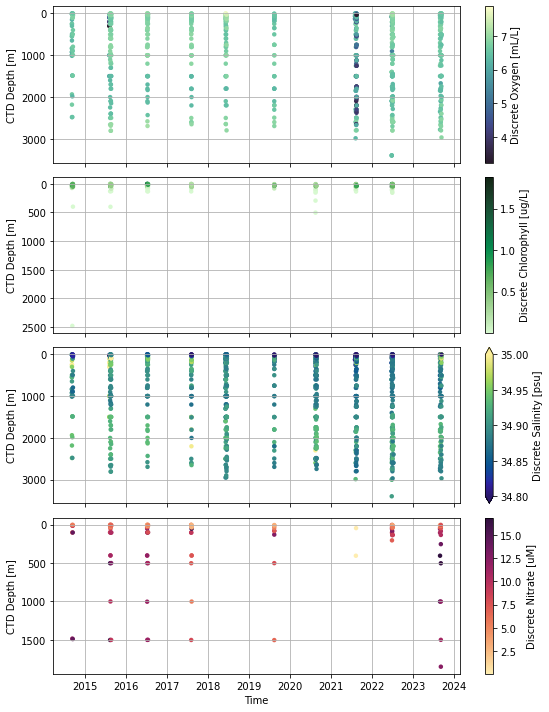

In [13]:
# Create the subplots with time on the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8,10), sharex=True, layout="tight")

# Discrete Oxygen
plt.subplot(4,1,1)
axs[0].invert_yaxis()
plt.scatter(x=time[flag_oxy], y=irm_qc["CTD_Depth"][flag_oxy], s=20,
            c=irm_qc["Discrete_Oxygen"][flag_oxy], cmap=cmap_oxy,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Oxygen [mL/L]")
axs[0].set_ylabel("CTD Depth [m]")

# Discrete Chlorophyll
plt.subplot(4,1,2)
axs[1].invert_yaxis()
plt.scatter(x=time[flag_chl], y=irm_qc["CTD_Depth"][flag_chl], s=20,
            c=irm_qc["Discrete_Chlorophyll"][flag_chl], cmap=cmap_chl,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Chlorophyll [ug/L]")
axs[1].set_ylabel("CTD Depth [m]")

# Discrete Salinity
plt.subplot(4,1,3)
axs[2].invert_yaxis()
plt.scatter(x=time[flag_sal], y=irm_qc["CTD_Depth"][flag_sal], s=20,
            c=irm_qc["Discrete_Salinity"][flag_sal], cmap=cmap_salt,
            edgecolors="none", vmin=34.8, vmax=35)
plt.grid()
plt.colorbar(label="Discrete Salinity [psu]", extend='both')
axs[2].set_ylabel("CTD Depth [m]")

# Discrete Nitrate
plt.subplot(4,1,4)
axs[3].invert_yaxis()
plt.scatter(x=time[flag_ntr], y=irm_qc["CTD_Depth"][flag_ntr], s=20,
            c=irm_qc["Discrete_Nitrate"][flag_ntr], cmap=cmap_nitr,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Nitrate [uM]")
axs[3].set_ylabel("CTD Depth [m]")

axs[3].set_xlabel("Time")

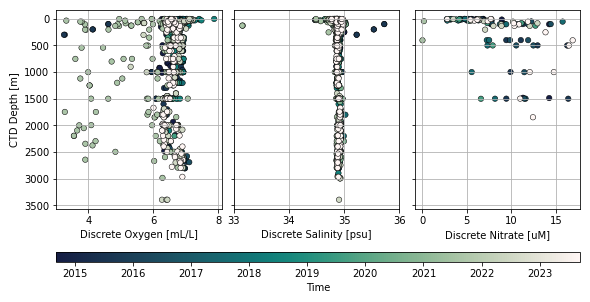

In [14]:
# Create the subplots with time indicated by color
fig, axs = plt.subplots(1, 3, figsize=(8,4), sharey=True, constrained_layout=True)
subfig = fig.subfigures(nrows=1, ncols=1)

# Discrete Oxygen
plt.subplot(1,3,1)
axs[0].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Oxygen"][flag_oxy], y=irm_qc["CTD_Depth"][flag_oxy], s=30,
            c=mpl_time[flag_oxy], cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[0].set_ylabel("CTD Depth [m]")
axs[0].set_xlabel("Discrete Oxygen [mL/L]")

# Discrete Salinity
plt.subplot(1,3,2)
axs[1].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Salinity"][flag_sal], y=irm_qc["CTD_Depth"][flag_sal],
            c=mpl_time[flag_sal], cmap=cmap_time, s=30, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[1].set_xlabel("Discrete Salinity [psu]")
axs[1].set_xlim([33,36])

# Discrete Nitrate
plt.subplot(1,3,3)
axs[2].invert_yaxis()
plt.scatter(x=irm_qc["Discrete_Nitrate"][flag_ntr], y=irm_qc["CTD_Depth"][flag_ntr], s=30,
            c=mpl_time[flag_ntr], cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[2].set_xlabel("Discrete Nitrate [uM]")

time_map = cm.ScalarMappable(norm=normalizer, cmap=cmap_time)
subfig.colorbar(time_map, ax=axs.ravel().tolist(), label="Time", ticks=AutoDateLocator(),
             format=AutoDateFormatter(locator), location="bottom", aspect=50)
plt.show()